## **E-commerce Text Classification Project**

PROGRAM NAME: E_commerce_project

AUTHOR: Kevin Kluck

DATE: 12/16/2020

Python Version:3.7.6

ABSTRACT: Classify text into 4 categories from E-Commerce website.

### **Importthe libraries, load dataset**

In [88]:
##############################
##                          ##
##      Import Libraries    ##
##                          ##
##############################
seed = 1729
import cv2
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

import re, string, unicodedata
import pandas as pd
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import re
import unicodedata
!pip install contractions
import contractions
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer


############# python formating ##################
extra = {'Bold': '\x1b[1m',
        'Underline': '\x1b[4m',
        'End': '\x1b[0m',
         'Blue': '\x1b[94m'}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
########## Mount Drive ##############
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
############# Define Paths ############
data_path = '/content/drive/MyDrive/Colab Notebooks/Data/Ecommerce/ecommerceDataset.csv'

In [91]:
############## load data #################
df = pd.read_csv(data_path)

### **Exploratory Data Analysis**

In [92]:
########### Shape of Data ##############
print(extra['Bold'],extra['Blue'],extra['Underline'],"\nData Shape")
print("\n")
print(extra['End'],df.shape)

   
Data Shape


 (50424, 2)


In [93]:
df.describe()

,Label,Text
count,50424,50423
unique,4,27801
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19312,30


I have over 50,000 text in this data set. I have 4 unique groups, which Household is the largest group. From the text side it appears a good number of items have the same description. From the count there might be one missing text observation. There is one produce description that has occurd as many as thirty times.

In [94]:
print(extra['Bold'],extra['Blue'],extra['Underline'],"\nData Types")
print("\n")
print(extra['End'],df.dtypes)

   
Data Types


 Label    object
Text     object
dtype: object


In [95]:
print(extra['Bold'],extra['Blue'],extra['Underline'],"\nNumber of Missing Values per Column")
print("\n")
print(extra['End'],df.isnull().sum())

   
Number of Missing Values per Column


 Label    0
Text     1
dtype: int64


In [96]:
############### Drop missing ###################
df = df.dropna()
df.isnull().sum()


Label    0
Text     0
dtype: int64

In [97]:
print(extra['Bold'],extra['Blue'],extra['Underline'],"\nStatistical Summary")
print(extra['End'])
df['Label'].value_counts(normalize=True).round(2)

   
Statistical Summary



Household                 0.38
Books                     0.23
Electronics               0.21
Clothing & Accessories    0.17
Name: Label, dtype: float64

In [98]:
labels = np.unique(df.Label)
labels

array(['Books', 'Clothing & Accessories', 'Electronics', 'Household'],
      dtype=object)

In [99]:
df.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [100]:
text = df.loc[1:5, 'Text']
text

1    Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2    Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3    Proline Men's Track Jacket Proline Woven, 100%...
4    Chef's Garage 2 Slot Edge Grip Kitchen Knife S...
5    SYGA Electric Knife Sharpener, Multi-Functiona...
Name: Text, dtype: object

### **Text pre-processing**

In [101]:
######################## Make Pre-Processing Function ##########################

############### Tag Removal #######################
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

################ Replace Contractions ###############
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

############# Remove Numbers #############
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

############ Tokenize ####################
def tokenize_text(text):
    return nltk.word_tokenize(text)

############### Remove non=ASCII characters from list of tokenize words #########
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

############## Convert to lowercase ##############
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

############# Remove Punctuations ###############
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

############ Lemmatize ###########
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
        
    return new_words

############ Remove Stop words ##########
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

############ Put it all together in one function called pre_proccess
def pre_proccess(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    words = tokenize_text(text)
    
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)


In [102]:
from nltk.corpus import stopwords   
stopwords = stopwords.words('english')

######## Thanks Vinod for the list of custom words ###############
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stopwords = list(set(stopwords) - set(customlist))

lemmatizer = WordNetLemmatizer()

In [ ]:
!python3 -m pip install pandarallel to install pandarallel

  Created wheel for pandarallel: filename=pandarallel-1.5.1-cp36-none-any.whl size=17127 sha256=6c6d7c618afde173307ebd91dba88585c195763a5db51d9626af9ecd2a8c767a
  Stored in directory: /root/.cache/pip/wheels/6f/c8/e5/d43fa63105ce1dd22f4df51bc2edfefd54d92ce64f25326314
  Created wheel for to: filename=to-0.3-cp36-none-any.whl size=33556 sha256=b8031ffd7fafd72e736eae7905a1b6bbf9e5eb38d1298045c0ef825f2acb169e
  Stored in directory: /root/.cache/pip/wheels/e4/d5/66/ca1fdaff491ab8f563cdf5d30a86280673511516335ac4afd1
Successfully built pandarallel to


In [103]:
############# Use pandarallel to make processing faster ##########
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=4)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [104]:
df['Text_p'] = df.parallel_apply(lambda row: pre_proccess(row['Text']), axis=1)

In [105]:
df.head(n=5)

,Label,Text,Text_p
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...,styleys work iron coat rack hanger creative fa...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...,cuisinart ccobkn deluxe electric opener black ...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...,anchor penta amp way switch white pack anchor ...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%...",proline men track jacket proline weave polyest...
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...,chef garage slot edge grip kitchen knife sharp...


In [106]:
df.head(n=20)

,Label,Text,Text_p
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...,styleys work iron coat rack hanger creative fa...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...,cuisinart ccobkn deluxe electric opener black ...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...,anchor penta amp way switch white pack anchor ...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%...",proline men track jacket proline weave polyest...
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...,chef garage slot edge grip kitchen knife sharp...
5,Household,"SYGA Electric Knife Sharpener, Multi-Functiona...",syga electric knife sharpener multifunctional ...
6,Household,Disha Napkin Dispenser - Chrome You are going ...,disha napkin dispenser chrome go love useful f...
7,Electronics,Sony Alpha A6000L 24.3MP Digital SLR Camera (B...,sony alpha al mp digital slr camera black mm l...
8,Electronics,xcluma Antenna for GSM FCT Device GSM FCT Cabl...,xcluma antenna gsm fct device gsm fct cable an...
9,Household,KitschKitsch Kids Plastic Portable Folding Tab...,kitschkitsch kid plastic portable fold table s...


#### **Vecorization

In [107]:
x = df['Text_p']
y = df['Label']

In [108]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

In [109]:
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
vectorizer.get_feature_names()

['abs',
 'ac',
 'access',
 'accessories',
 'accessory',
 'accurate',
 'across',
 'action',
 'adapter',
 'add',
 'addition',
 'additional',
 'adjust',
 'adjustable',
 'advance',
 'age',
 'air',
 'allow',
 'almost',
 'along',
 'also',
 'aluminium',
 'always',
 'amaze',
 'amazon',
 'amazonbasics',
 'american',
 'analysis',
 'android',
 'angle',
 'another',
 'answer',
 'anyone',
 'anywhere',
 'aplusp',
 'apple',
 'apply',
 'approach',
 'approx',
 'area',
 'areas',
 'arm',
 'around',
 'art',
 'attach',
 'attractive',
 'audio',
 'author',
 'auto',
 'automatic',
 'automatically',
 'available',
 'avoid',
 'award',
 'away',
 'baby',
 'back',
 'bag',
 'balance',
 'band',
 'bank',
 'bar',
 'base',
 'basic',
 'basket',
 'bass',
 'bath',
 'bathroom',
 'batteries',
 'battery',
 'bean',
 'bear',
 'beautiful',
 'beauty',
 'become',
 'bed',
 'bedroom',
 'begin',
 'behind',
 'belt',
 'best',
 'bestselling',
 'better',
 'big',
 'black',
 'blade',
 'blades',
 'blend',
 'block',
 'blue',
 'bluetooth',
 'bo

#### **CountVectorizer**

In [111]:
vectorizer = CountVectorizer(max_features=1000)
# vectorizer.fit(X_train)
# X_train_features = vectorizer.transform(X_train)
x_train_features = vectorizer.fit_transform(x_train)
x_test_features = vectorizer.transform(x_test)

In [112]:
model1 = xgb.XGBClassifier()

In [113]:
model1.fit(x_train_features, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [114]:
model1.score(x_train_features, y_train), model1.score(x_test_features, y_test)

(0.8709768812330009, 0.8654723342367951)

In [115]:
data_features = vectorizer.transform(df['Text_p'])

In [116]:
model1.score(x_train_features, y_train), model1.score(x_test_features, y_test)
df['group_p1'] = model1.predict(data_features)
df['flag1'] = df['group_p1']==df['Label']

In [117]:
df['group_p1']

0                     Household
1                     Household
2                     Household
3        Clothing & Accessories
4                     Household
                  ...          
50419                     Books
50420    Clothing & Accessories
50421    Clothing & Accessories
50422                     Books
50423                 Household
Name: group_p1, Length: 50423, dtype: object

In [118]:
print(f"Overall Accuracy: {df['flag1'].mean():.2%}")
print("\n")
print(df.groupby(by='group_p1')['flag1'].agg(['mean','count']).round(2))

Overall Accuracy: 86.93%


                        mean  count
group_p1                           
Books                   0.96   9349
Clothing & Accessories  0.93   8424
Electronics             0.96   8917
Household               0.78  23733


#### **TfidfVectorizer**

In [119]:
vectorizer = TfidfVectorizer(max_features=1000)
x_train_features = vectorizer.fit_transform(x_train)
x_test_features = vectorizer.transform(x_test)


In [120]:

model2 = xgb.XGBClassifier()

model2.fit(x_train_features, y_train)

print(model2.score(x_train_features, y_train), model2.score(x_test_features, y_test))

data_features = vectorizer.transform(df['Text_p'])

df['group_p2'] = model2.predict(data_features)

df['flag2'] = df['group_p2']==df['Label']

print(f"Overall Accuracy: {df['flag2'].mean():.2%}")
print("\n")
print(df.groupby(by='group_p2')['flag2'].agg(['mean','count']).round(2))

feature_imp = pd.DataFrame(zip(model.feature_importances_, vectorizer.get_feature_names()),
                          columns=['importance', 'word'])


0.8735834088848595 0.8665300456138031
Overall Accuracy: 87.15%


                        mean  count
group_p2                           
Books                   0.96   9309
Clothing & Accessories  0.94   8382
Electronics             0.96   8952
Household               0.78  23780


In [121]:
############# Prepaire variables for confuse Matrix ###############
# Predict the values from the validation dataset

data_features = vectorizer.transform(x_test)
Y_pred = model1.predict(data_features)


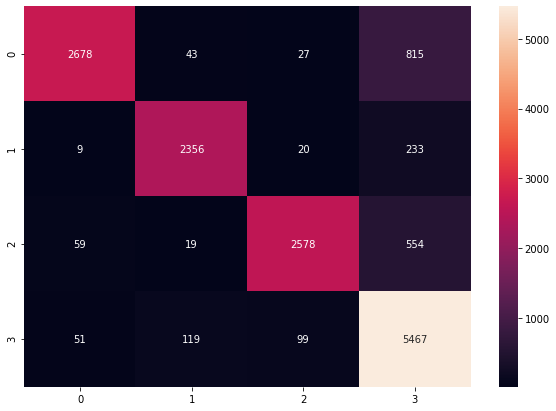

In [122]:
########################## Make Confuse Matrix for CountVectorizer method ######################
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#conf_mat = confusion_matrix(y_true,result )
conf_mat = confusion_matrix(y_test, Y_pred )

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 4)],
                  columns = [i for i in range(0, 4)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

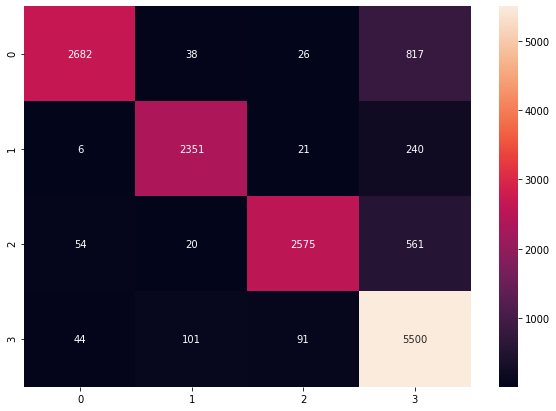

In [123]:
########################## Make Confuse Matrix for TfidfVectorizer method ######################
Y_pred = model2.predict(data_features)

conf_mat = confusion_matrix(y_test, Y_pred )

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 4)],
                  columns = [i for i in range(0, 4)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

### **Summary**

The point of this exercise was to create a model which took text data and correctly classify the text into different groups. The data sets is possile from a department store which has descriptions of items, i. e. the text variable, match with a caterogy of the item.("Electronics", "HouseHold", "Books", "Clothing & Accessories")

Like any data set, in order to build the best model, you should clean up the data. Since this is textual data, I used a method of pre-proccessing that involved removing numbers, stop words, punctuations, html tags. 

I used two modeling techniques, countvectorizer and TfidfVectorizer to help catgorize the data. Countvectorizer gave a slightly higher accuracy then TfidfVectorizer. With an accuracy of 88 percent that's seems okay but there is always room for improvement. 

Pre-Processing can be improved by adding other techniques along with using less features for each model.


